In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os

base_path = "/content/drive/MyDrive/Car-Bike-Dataset"

for root, dirs, files in os.walk(base_path):
    print("Folder:", root)
    print("Files:", files)
    print("-" * 60)


Folder: /content/drive/MyDrive/Car-Bike-Dataset
Files: []
------------------------------------------------------------
Folder: /content/drive/MyDrive/Car-Bike-Dataset/Car
Files: ['Car (258).jpeg', 'Car (1873).jpeg', 'Car (24).jpeg', 'Car (1906).jpeg', 'Car (229).jpeg', 'Car (232).jpeg', 'Car (191).jpeg', 'Car (1867).jpeg', 'Car (223).jpeg', 'Car (247).jpeg', 'Car (242).jpeg', 'Car (1872).jpeg', 'Car (263).jpeg', 'Car (1870).jpeg', 'Car (1883).jpeg', 'Car (241).jpeg', 'Car (1936).jpeg', 'Car (1888).jpeg', 'Car (1914).jpeg', 'Car (1878).jpeg', 'Car (1932).jpeg', 'Car (214).jpeg', 'Car (1913).jpeg', 'Car (251).jpeg', 'Car (27).jpeg', 'Car (1900).jpeg', 'Car (1890).jpeg', 'Car (1893).jpeg', 'Car (209).jpeg', 'Car (1920).jpeg', 'Car (1903).jpeg', 'Car (1905).jpeg', 'Car (224).jpeg', 'Car (207).jpeg', 'Car (208).jpeg', 'Car (1876).jpeg', 'Car (261).jpeg', 'Car (252).jpeg', 'Car (1875).jpeg', 'Car (1895).jpeg', 'Car (1933).jpeg', 'Car (212).jpeg', 'Car (259).jpeg', 'Car (26).jpg', 'Car (233).

In [5]:

bike_folder = "/content/drive/MyDrive/Car-Bike-Dataset/Bike"
car_folder = "/content/drive/MyDrive/Car-Bike-Dataset/Car"

# List of images

bike_images = os.listdir(bike_folder)
car_images = os.listdir(car_folder)

# Number of images

num_bike_images = len(bike_images)
num_car_images = len(car_images)

num_bike_images , num_car_images


(2000, 2000)

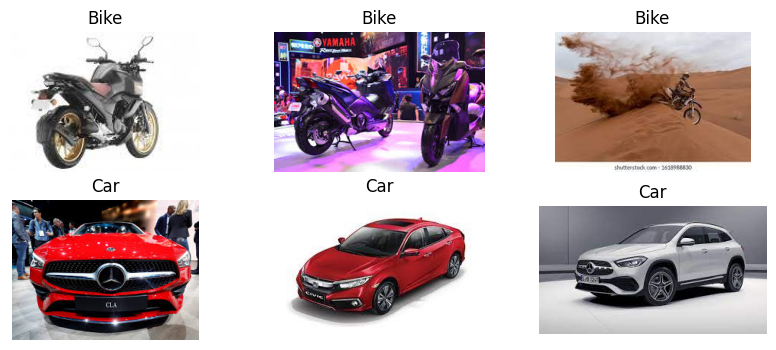

In [6]:

plt.figure(figsize=(10, 4))

# Bike images

for i in range(3):
    img = cv2.imread(os.path.join(bike_folder, bike_images[i]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title("Bike")
    plt.axis('off')

# Car images

for i in range(3):
    img = cv2.imread(os.path.join(car_folder, car_images[i]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 3, i+4)
    plt.imshow(img)
    plt.title("Car")
    plt.axis('off')

plt.show()


In [ ]:

# Resized them to 64×64
# Converted BGR → RGB
# Created numpy arrays
# Assigned labels (0 = bike, 1 = car)

dataset_path = "/content/drive/MyDrive/Car-Bike-Dataset"
bike_folder = os.path.join(dataset_path, "Bike")
car_folder = os.path.join(dataset_path, "Car")

# Function to load images

def load_images_from_folder(folder, label, num_px=64):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (num_px, num_px))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
            labels.append(label)
    return images, labels



bike_images, bike_labels = load_images_from_folder(bike_folder, 0)
car_images, car_labels = load_images_from_folder(car_folder, 1)

# Combine

X = np.array(bike_images + car_images)
Y = np.array(bike_labels + car_labels)


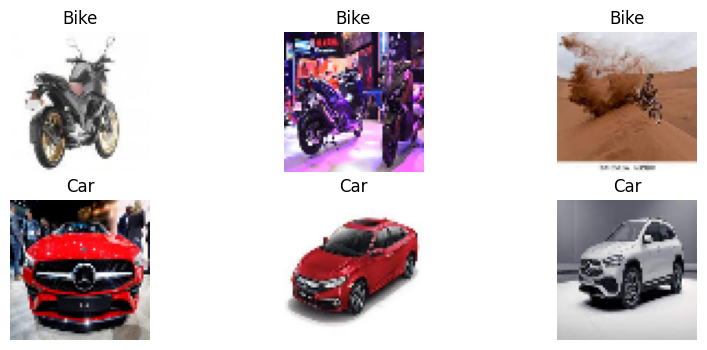

In [8]:
plt.figure(figsize=(10, 4))

# 3 Bike images

for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.imshow(X[i])
    plt.title("Bike")
    plt.axis('off')

# 3 Car images

for i in range(3):
    plt.subplot(2, 3, i+4)
    plt.imshow(X[len(bike_images) + i])
    plt.title("Car")
    plt.axis('off')

plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

Y = Y.reshape(1, -1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y.T, test_size=0.2, random_state=42, stratify=Y.T)


In [10]:
import h5py

with h5py.File("train_carbike.h5", "w") as hf:
    hf.create_dataset("train_set_x", data=X_train)
    hf.create_dataset("train_set_y", data=Y_train)
    hf.create_dataset("test_set_x", data=X_test)
    hf.create_dataset("test_set_y", data=Y_test)

print("HDF5 dataset created successfully!")


HDF5 dataset created successfully!


In [11]:
with h5py.File("train_carbike.h5", "r") as hf:

    print("Datasets in file:", list(hf.keys()))
    print("train_set_x shape:", hf["train_set_x"].shape)
    print("train_set_y shape:", hf["train_set_y"].shape)
    print("test_set_x shape:", hf["test_set_x"].shape)
    print("test_set_y shape:", hf["test_set_y"].shape)


Datasets in file: ['test_set_x', 'test_set_y', 'train_set_x', 'train_set_y']
train_set_x shape: (3200, 64, 64, 3)
train_set_y shape: (3200, 1)
test_set_x shape: (800, 64, 64, 3)
test_set_y shape: (800, 1)


In [12]:
# Load datasets from HDF5

with h5py.File("train_carbike.h5", "r") as hf:
    X_train = np.array(hf["train_set_x"])
    Y_train = np.array(hf["train_set_y"])
    X_test = np.array(hf["test_set_x"])
    Y_test = np.array(hf["test_set_y"])

# Normalize

X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten

X_train_flatten = X_train.reshape(X_train.shape[0], -1).T
X_test_flatten = X_test.reshape(X_test.shape[0], -1).T


In [13]:
def initialize_parameters_shallow(n_x, n_h, n_y):

    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    return W1, b1, W2, b2


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

In [14]:

def forward_propagation_shallow(W1, b1, W2, b2, X, Y):
    m = X.shape[1]

    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)

    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cost = -1/m * np.sum(Y*np.log(A2) + (1-Y)*np.log(1-A2))
    return Z1, A1, Z2, A2, cost


In [ ]:
def backward_propagation_shallow(Z1, A1, A2, W2, X, Y):
    
    m = X.shape[1]

    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * (Z1 > 0)   # derivative of ReLU
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2


In [16]:
def optimize_shallow(W1, b1, W2, b2, X, Y, num_iterations=2000, learning_rate=0.01):
    costs = []

    for i in range(num_iterations):

        Z1, A1, Z2, A2, cost = forward_propagation_shallow(W1, b1, W2, b2, X, Y)
        dW1, db1, dW2, db2 = backward_propagation_shallow(Z1, A1, A2, W2, X, Y)

        W1 = W1 - learning_rate*dW1
        b1 = b1 - learning_rate*db1
        W2 = W2 - learning_rate*dW2
        b2 = b2 - learning_rate*db2

        if i % 100 == 0:
            costs.append(cost)
            print(f"Iteration {i}: cost = {cost}")

    return W1, b1, W2, b2, costs


In [ ]:
def predict_shallow(W1, b1, W2, b2, X):
    
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    predictions = (A2 > 0.5).astype(int)
    return predictions


In [ ]:
n_x = X_train_flatten.shape[0]   # input features
n_h = 5                          # hidden neurons
n_y = 1                          # output

W1, b1, W2, b2 = initialize_parameters_shallow(n_x, n_h, n_y)

W1, b1, W2, b2, costs = optimize_shallow(W1, b1, W2, b2, X_train_flatten, Y_train.T, num_iterations=1500, learning_rate=0.01)


Iteration 0: cost = 0.6932610522975442
Iteration 100: cost = 0.6883020351746193
Iteration 200: cost = 0.6533065168143055
Iteration 300: cost = 0.5635363217965876
Iteration 400: cost = 0.5111106713525684
Iteration 500: cost = 0.4857389871410938
Iteration 600: cost = 0.510554094929187
Iteration 700: cost = 0.47974845112485315
Iteration 800: cost = 0.46765560532569356
Iteration 900: cost = 0.46108087684462107
Iteration 1000: cost = 0.45001936299286044
Iteration 1100: cost = 0.449562922538595
Iteration 1200: cost = 0.4406890374796952
Iteration 1300: cost = 0.4318527360976951
Iteration 1400: cost = 0.4261080174163175


In [24]:
Y_pred_train = predict_shallow(W1, b1, W2, b2, X_train_flatten)
Y_pred_test  = predict_shallow(W1, b1, W2, b2, X_test_flatten)

train_acc = 100 - np.mean(np.abs(Y_pred_train - Y_train.T)) * 100
test_acc = 100 - np.mean(np.abs(Y_pred_test - Y_test.T)) * 100

print("Training Accuracy:", train_acc, "%")
print("Test Accuracy:", test_acc, "%")


Training Accuracy: 81.25 %
Test Accuracy: 75.125 %
